# TODO Titolo

## Initialization

### imports

Data download related

In [1]:
import os
from os import path   # system path
from os import mkdir  # create a directory
from glob import glob # query folders
import requests       # download
import zipfile        # extract zip files
from tqdm import tqdm # progress bar

Data manipulation

In [2]:
import geopandas as gpd # geo Pandas
import pandas as pd # Pandas
import matplotlib.pyplot as plt # to make graphs
import random # random
from shapely.geometry import Point, Polygon, MultiPolygon, LineString, MultiLineString # Funzione per generare punti casuali all'interno di un poligono # to deal with geometries

### data

In [3]:
COLAB = None
try:
    # only for google drive linking (on Colab)
    from google.colab import drive
    # Link Google Drive account to use relative pathnames
    drive.mount("/content/gdrive", readonly = False)
    COLAB = True
except:
    COLAB = False
print("Notbook is running in Colab environment:", COLAB)

Mounted at /content/gdrive
Notbook is running in Colab environment: True


In [6]:
#CSV_AND_JSON_FOLDER = "/content/gdrive/MyDrive/Data Science/smart cities/CSVs and JSONs from notebooks" # Edo Colab
CSV_AND_JSON_FOLDER = "/content/gdrive/MyDrive/smart cities/CSVs and JSONs from notebooks" # Davide Colab

In [8]:
# Elenca tutti i file nella cartella
files = os.listdir(CSV_AND_JSON_FOLDER)

# Filtra solo i file CSV
csv_files = [f for f in files if f.endswith('csv')]

# Crea due dizionari per memorizzare i DataFrame
pd_dataframes = {}
gpd_dataframes = {}

# Leggi ogni file CSV in un DataFrame
for csv_file in csv_files:
    file_path = os.path.join(CSV_AND_JSON_FOLDER, csv_file)
    pd_dataframes[csv_file] = pd.read_csv(file_path)
    print(f"Imported {csv_file}")

# Filtra solo i file JSON
json_files = [f for f in files if f.endswith('json')]

# Leggi ogni file JSON in un DataFrame
for json_file in json_files:
    file_path = os.path.join(CSV_AND_JSON_FOLDER, json_file)
    gpd_dataframes[json_file] = gpd.read_file(file_path)
    print(f"Imported {json_file}")

# Filtra solo i file feather
feather_files = [f for f in files if f.endswith('feather')]

# Leggi ogni file feather in un DataFrame
for feather_file in feather_files:
    file_path = os.path.join(CSV_AND_JSON_FOLDER, feather_file)
    gpd_dataframes[feather_file] = gpd.read_feather(file_path)
    print(f"Imported {feather_file}")

Imported green_divided_in_areas.csv
Imported air_sc.csv
Imported air_milano.csv


<ipython-input-8-69ba3f5dbc95>:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_dataframes[csv_file] = pd.read_csv(file_path)


Imported buildings_divided_in_areas.csv
Imported green_points.json
Imported comune.json
Imported stations_milano.json
Imported sc_stations.json
Imported osm_milano_natural.json
Imported osm_milano_buildings.json
Imported osm_milano_streets.json
Imported buildings_points.feather
Imported green_divided_in_areas.feather
Imported green_points.feather


In [9]:
comune = gpd_dataframes['comune.json']
comune.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,dataset,entity,source,geometry
0,1,1,1,0,201,1001,001001,Agliè,0,0,18035.254001,1.314626e+07,comune,territory,istat,"POLYGON ((404703.561 5026682.656, 404733.562 5..."
1,1,1,1,0,201,1002,001002,Airasca,0,0,18408.906988,1.573931e+07,comune,territory,istat,"POLYGON ((380700.909 4977305.520, 380702.627 4..."
2,1,1,1,0,201,1003,001003,Ala di Stura,0,0,31834.156081,4.633156e+07,comune,territory,istat,"POLYGON ((364710.856 5022090.677, 364725.872 5..."
3,1,1,1,0,201,1004,001004,Albiano d'Ivrea,0,0,18927.262827,1.173969e+07,comune,territory,istat,"POLYGON ((415942.510 5033304.612, 415962.885 5..."
4,1,1,1,0,201,1006,001006,Almese,0,0,17057.413964,1.787412e+07,comune,territory,istat,"POLYGON ((376934.550 4999073.855, 376941.551 4..."


In [10]:
stations_milano = gpd_dataframes['stations_milano.json']
stations_milano.head()

,id,name,id_arpa,inizio_operativita,fine_operativita,inquinanti,dataset,entity,source,color,geometry
0,2,via Pascal *,100,1900-01-01,2099-12-31,"NO2, SO2, PM25, SO2, O3, PM10, C6H6",stations_milano,station,milano,blue,POINT (518351.042 5035645.702)
1,4,viale Marche,2,1900-01-01,2099-12-31,"C6H6, CO_8h, PM25, PM10, NO2",stations_milano,station,milano,blue,POINT (514910.677 5038103.127)
2,6,via Senato *,125,1900-01-01,2099-12-31,"PM25, PM10, C6H6, CO_8h, NO2",stations_milano,station,milano,blue,POINT (515470.916 5035238.303)
3,7,Verziere,85,1900-01-01,2099-12-31,"O3, PM10, NO2, CO_8h",stations_milano,station,milano,blue,POINT (515271.158 5034460.138)


In [11]:
sc_stations = gpd_dataframes['sc_stations.json']
sc_stations.head()

,id,name,Latitude,Longitude,dataset,entity,source,color,geometry
0,#44216,Centro,45.4617222,9.182333333333332,sc_chosen_stations,station_sc,sensor community,red,POINT (514254.769 5034260.134)
1,#40256,Porta Vittoria,45.462109495758476,9.209781789416478,sc_chosen_stations,station_sc,sensor community,red,POINT (516400.569 5034308.395)
2,#32399,Via Meda,45.43998127831078,9.178070145718733,sc_chosen_stations,station_sc,sensor community,red,POINT (513926.824 5031844.054)
3,#70169,Lodi,45.442101399035224,9.21225714798778,sc_chosen_stations,station_sc,sensor community,red,POINT (516599.959 5032086.080)
4,#50128,Piazza Leonardo,45.47777813047526,9.224090852257673,sc_chosen_stations,station_sc,sensor community,red,POINT (517514.386 5036052.144)


In [12]:
osm_milano_natural = gpd_dataframes['osm_milano_natural.json']
osm_milano_natural.head()

,id,lat,changeset,version,timestamp,visible,lon,tags,natural,wetland,osm_type,water,dataset,entity,source,color,area,geometry
0,461715328,45.490875,0.0,6,1696267867,0,9.134479,"{'ele': '185', 'height': '50', 'name': 'Monte ...",peak,None,node,None,osm_milano_natural,natural,osm,forestgreen,0.0,POINT (510508.077 5037491.566)
1,761247282,45.464874,0.0,3,1408036318,0,9.203583,"{'leaf_type': 'broadleaved', 'species': 'Magno...",tree,None,node,None,osm_milano_natural,natural,osm,forestgreen,0.0,POINT (515915.156 5034614.305)
2,935465497,45.437714,0.0,1,1286042622,0,9.154628,None,tree,None,node,None,osm_milano_natural,natural,osm,forestgreen,0.0,POINT (512093.888 5031588.334)
3,935465525,45.437599,0.0,1,1286042622,0,9.154697,None,tree,None,node,None,osm_milano_natural,natural,osm,forestgreen,0.0,POINT (512099.357 5031575.631)
4,935465528,45.437283,0.0,1,1286042622,0,9.153111,None,tree,None,node,None,osm_milano_natural,natural,osm,forestgreen,0.0,POINT (511975.307 5031540.218)


In [13]:
osm_milano_buildings = gpd_dataframes['osm_milano_buildings.json']
osm_milano_buildings.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,operator,...,version,tags,osm_type,addr:place,changeset,dataset,entity,color,area,geometry
0,None,None,None,None,None,None,None,Chiesa di San Pietro in Sala,None,None,...,13,"{'denomination': 'roman_catholic', 'religion':...",way,None,NaN,osm_milano_building,building,goldenrod,1544.787387,"POLYGON ((512223.542 5034992.969, 512228.300 5..."
1,None,None,None,None,None,None,None,Teatro Nazionale,None,None,...,11,{'comment': 'address was previously as Piazza ...,way,None,NaN,osm_milano_building,building,goldenrod,1417.522567,"POLYGON ((512053.946 5034796.422, 512022.478 5..."
2,None,None,None,None,None,None,None,Milan Marriott Hotel,None,None,...,12,"{'beds': '322', 'stars': '4', 'tourism': 'hotel'}",way,None,NaN,osm_milano_building,building,goldenrod,4363.412422,"POLYGON ((512034.768 5034143.732, 512035.326 5..."
3,None,None,None,None,None,None,None,None,None,None,...,11,"{'denomination': 'catholic', 'religion': 'chri...",way,None,NaN,osm_milano_building,building,goldenrod,1016.341193,"POLYGON ((512239.439 5034332.718, 512219.402 5..."
4,None,None,None,None,None,None,None,None,None,None,...,37,"{'layer': '2', 'min_height': '9'}",way,None,NaN,osm_milano_building,building,goldenrod,6052.352077,"POLYGON ((515865.527 5036965.860, 515857.507 5..."


In [14]:
osm_milano_streets = gpd_dataframes['osm_milano_streets.json']
osm_milano_streets.head()

,access,area,bicycle,bicycle_road,bridge,busway,cycleway,est_width,foot,footway,...,timestamp,version,tags,osm_type,length,dataset,entity,source,color,geometry
0,None,None,None,None,None,None,None,None,None,None,...,1541879471,6,"{'visible': False, 'loc_ref': '7238_35162'}",way,32.0,osm_milano_network,network,osm,firebrick,"MULTILINESTRING ((513158.467 5035847.123, 5131..."
1,None,None,None,None,None,None,None,None,None,None,...,1704294789,13,"{'visible': False, 'cycleway:both': 'no', 'lan...",way,50.0,osm_milano_network,network,osm,firebrick,"MULTILINESTRING ((511784.409 5034058.074, 5117..."
2,None,None,None,None,None,None,None,None,None,None,...,1510248808,15,"{'visible': False, 'incline': 'down', 'loc_ref...",way,72.0,osm_milano_network,network,osm,firebrick,"MULTILINESTRING ((513374.738 5035272.057, 5133..."
3,None,None,None,None,None,None,None,None,None,None,...,1681900795,10,"{'visible': False, 'cycling_width': 'mean', 'l...",way,89.0,osm_milano_network,network,osm,firebrick,"MULTILINESTRING ((511792.520 5034265.327, 5117..."
4,None,None,None,None,None,None,None,None,None,None,...,1713854946,17,"{'visible': False, 'cycleway:right': 'no', 'lo...",way,139.0,osm_milano_network,network,osm,firebrick,"MULTILINESTRING ((511443.600 5036059.479, 5114..."


### functions

In [15]:
def gdf_merge(gdfs):
  gdf_ref = gdfs[0]
  return pd.concat(
    [gdf.to_crs(gdf_ref.crs) for gdf in gdfs],
    ignore_index=True,
  )

# Graphs for the report

In [16]:
def cute_gplot_milano(gdf, edgecolor, column = "dataset", color_column = None, linewidth = None, markersize = None, **kwargs):
  if (type(gdf) is list):
    return cute_gplot_milano(gdf_merge(gdf), edgecolor, column = column, color_column = color_column, **kwargs)
  plot_gdf = gpd.GeoDataFrame(
    pd.concat([
      comune[comune["COMUNE"] == "Milano"],
      gdf.to_crs(comune.crs),
    ], ignore_index=True),
    crs=comune.crs,
  )
  if color_column is None:
      if linewidth is not None:
          if markersize is not None:
              ax = plot_gdf.plot(column = column, linewidth = linewidth, markersize = markersize, **kwargs)
          else:
              ax = plot_gdf.plot(column = column, linewidth = linewidth, **kwargs)
      else:
          if markersize is not None:
              ax = plot_gdf.plot(column = column, markersize = markersize, **kwargs)
          else:
              ax = plot_gdf.plot(column = column, **kwargs)
  else:
      if linewidth is not None:
          if markersize is not None:
              ax = plot_gdf.plot(color = plot_gdf[color_column].fillna('None'), linewidth = linewidth, markersize = markersize, **kwargs)
          else:
              ax = plot_gdf.plot(color = plot_gdf[color_column].fillna('None'), linewidth = linewidth, **kwargs)
      else:
          if markersize is not None:
              ax = plot_gdf.plot(color = plot_gdf[color_column].fillna('None'), markersize = markersize, **kwargs)
          else:
              ax = plot_gdf.plot(color = plot_gdf[color_column].fillna('None'), **kwargs)


  comune[comune["COMUNE"] == "Milano"].plot(ax = ax, facecolor = 'none', edgecolor = edgecolor)

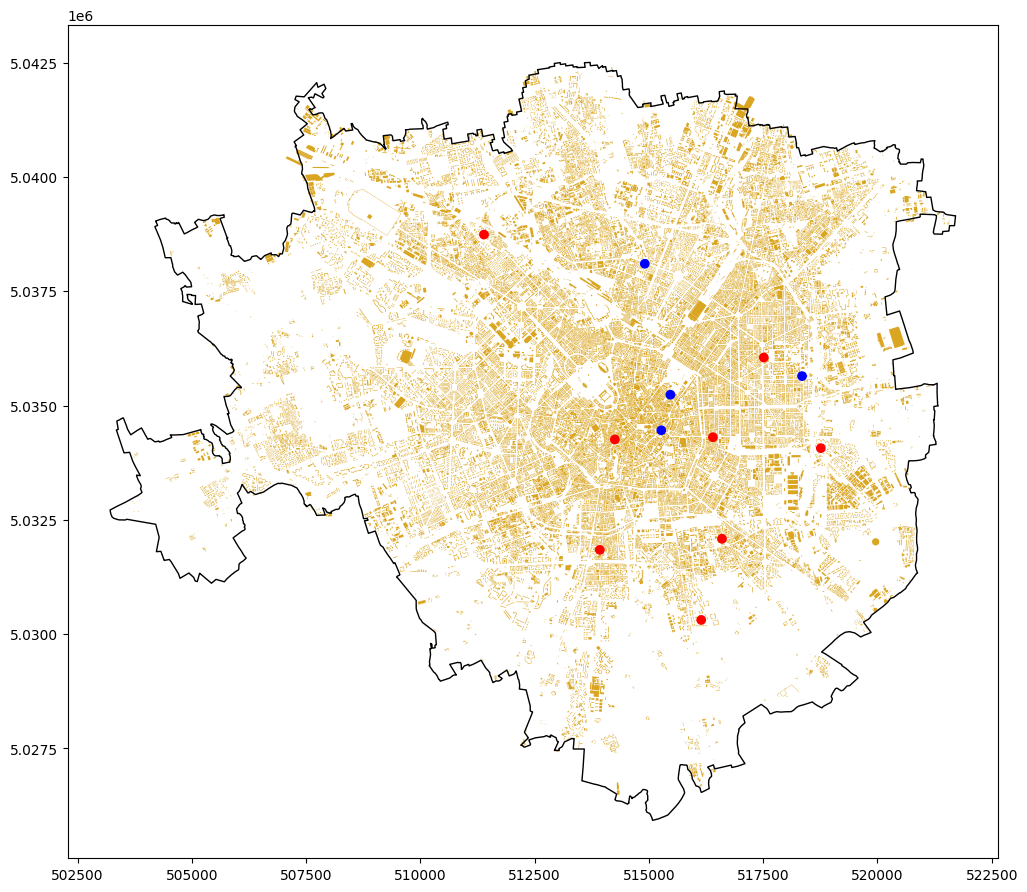

In [17]:
cute_gplot_milano([sc_stations, stations_milano, osm_milano_buildings], color_column = 'color', facecolor = 'none', edgecolor = 'black', figsize=(12,12))

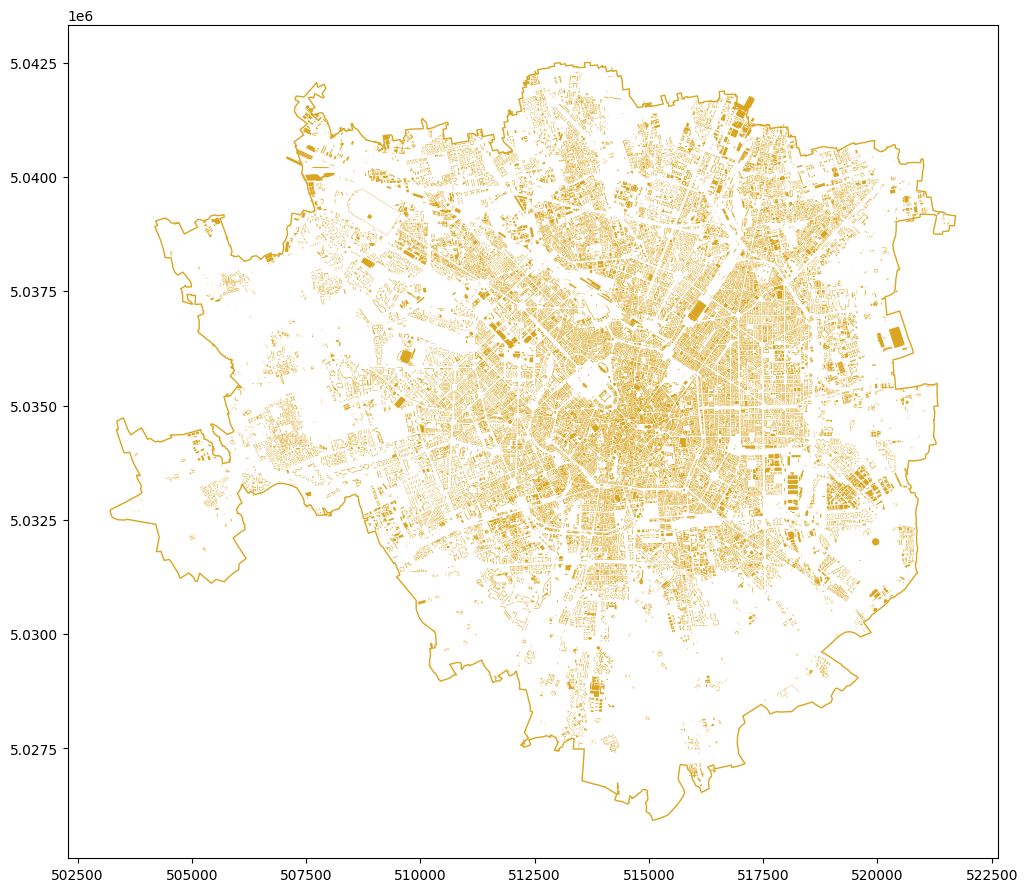

In [18]:
cute_gplot_milano(osm_milano_buildings, color_column = 'color', facecolor = 'none', edgecolor = 'goldenrod', figsize=(12,12))

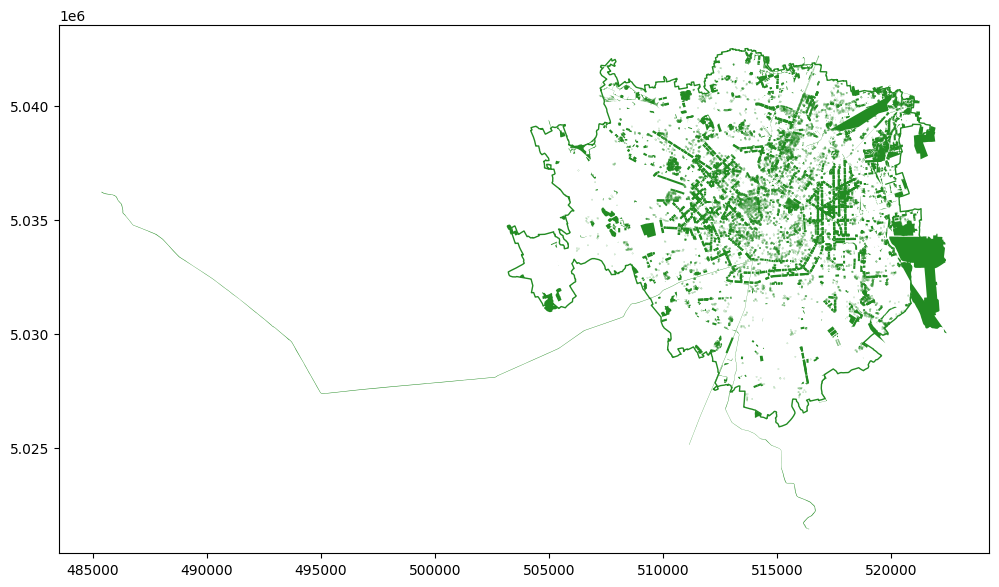

In [19]:
cute_gplot_milano(osm_milano_natural, color_column = 'color', facecolor = 'none', edgecolor = 'forestgreen', figsize=(12,12), markersize = 0.01)

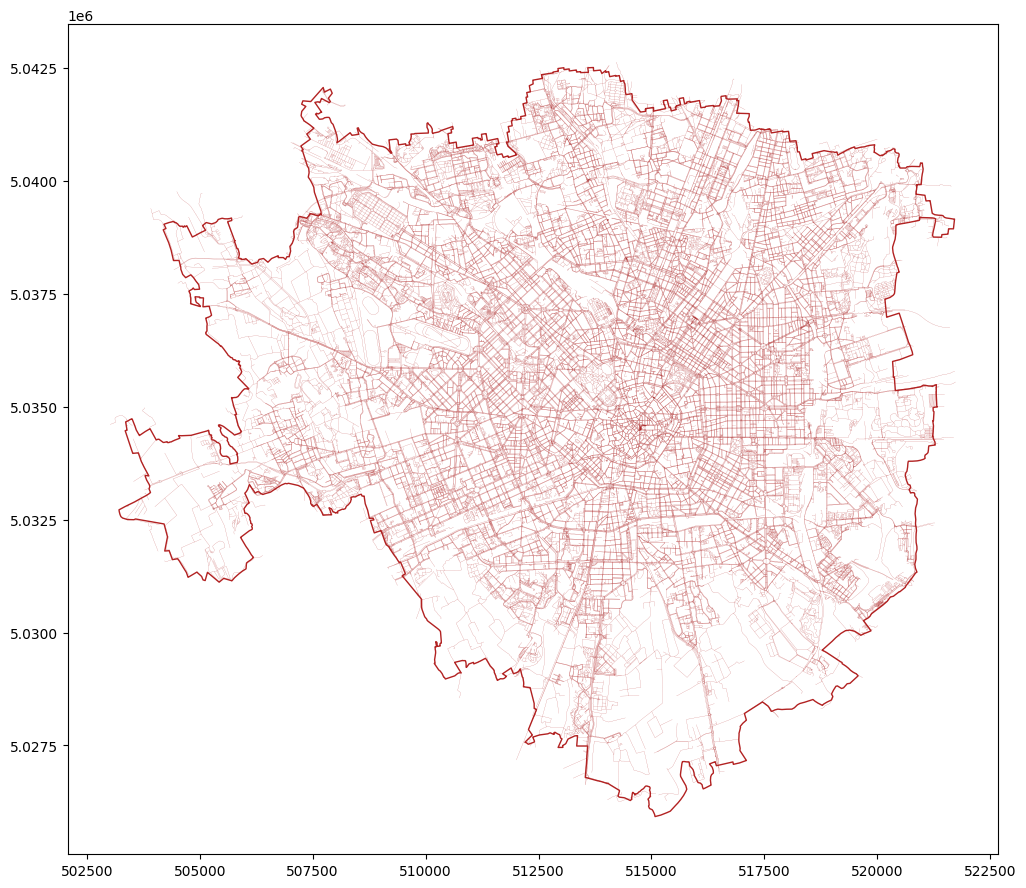

In [20]:
cute_gplot_milano(osm_milano_streets, color_column = 'color', facecolor = 'none', edgecolor = 'firebrick', figsize=(12,12), linewidth=0.1)